In [78]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)


# UCI 머신러닝 저장소의 Wine 데이터셋에 접근되지 않을 때
# 다음 코드의 주석을 제거하고 로컬 경로에서 데이터셋을 읽으세요:


# df_wine = pd.read_csv('wine.data', header=None)




df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']


print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [79]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [80]:
df_wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [81]:
df_wine['Class label']

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class label, Length: 178, dtype: int64

In [82]:
# 데이터 분리 
from sklearn.model_selection import train_test_split
# 데이터(x) 와 답(y) 분리
X=df_wine.iloc[:,1:].values #모든행, 1열부터 끝까지 
y=df_wine.iloc[:,0].values #래이블 (답)추출 

# 학습/테스트 데이터 (답) 분리
X_train, X_test, y_train, y_test=train_test_split(
    X
    , y #분리할 답
    , test_size=0.3 #30% 테스트 데이터로 사용 
    , random_state=1
    , stratify=y
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.bincount(y_train), np.bincount(y_test))


(124, 13) (54, 13) (124,) (54,)
[ 0 41 50 33] [ 0 18 21 15]


In [83]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
mms.fit(X_train) # 13피처의 min/max 구해진다
X_train_norm=mms.transform(X_train)
X_test_norm=mms.transform(X_test)

X_train_norm.max(), X_train_norm.min()

(np.float64(1.0), np.float64(0.0))

In [84]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(X_train)
X_train_std=ss.transform(X_train)
X_test_std=ss.transform(X_test)

In [85]:
# 4.5 유용한 특성 선택
# 3중 분류 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

lr=LogisticRegression(
    penalty='l1'
    , C=1.0 # 기본값
    , solver='liblinear'
    , multi_class='ovr'
)
lr.fit(X_train_std,y_train) # 모델 학습 진행

print(f'훈련 데이터에 대한 정확도 : {lr.score(X_train_std, y_train):.3f}')
print(f'테스트 데이터에 대한 정확도 : {lr.score(X_test_std, y_test):.3f}')

훈련 데이터에 대한 정확도 : 1.000
테스트 데이터에 대한 정확도 : 0.981


In [86]:
lr.coef_ # W(계수)의 값을 가지고 있다


array([[ 1.41301979,  0.        ,  0.27934049, -1.36310412,  0.        ,
         0.        ,  1.26837045,  0.        ,  0.        ,  0.        ,
         0.        ,  0.71302277,  2.21962684],
       [-1.68932146, -0.37306658, -0.82493611,  0.68120285, -0.12021524,
         0.        ,  0.39773933,  0.01198957,  0.24807138, -1.42651728,
         1.0593145 ,  0.        , -2.22898944],
       [ 0.        ,  0.23317354,  0.50718102,  0.        ,  0.16148825,
         0.        , -2.48636842, -0.11879007,  0.        ,  1.64965879,
        -0.88798931, -0.37840239,  0.        ]])

In [87]:
lr.intercept_

array([-1.11984234, -1.13604073, -2.22671368])

In [88]:
# 피처 선택
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

knn=KNeighborsClassifier(n_neighbors=5)

scores=[] # 정확도 저장하는 리스트
f_masks=[]
for n_feature in range(1,13):
    sfs=SequentialFeatureSelector(
        knn
        , n_features_to_select=n_feature
    )
    sfs.fit(X_train_std, y_train) # feature selection
    f_mask=sfs.support_ # 선택된 피처 boolean
    f_masks.append(f_mask)
    knn.fit(
        X_train_std[:,f_mask]
        ,y_train
    )
    scores.append(knn.score(X_train_std[:,f_mask], y_train))

In [89]:
f_masks

[array([False, False, False, False, False, False,  True, False, False,
        False, False, False, False]),
 array([ True, False, False, False, False, False,  True, False, False,
        False, False, False, False]),
 array([ True, False, False, False, False, False,  True, False, False,
        False,  True, False, False]),
 array([ True, False, False, False, False, False,  True, False, False,
        False,  True, False,  True]),
 array([ True, False, False, False, False, False,  True,  True, False,
        False,  True, False,  True]),
 array([ True, False,  True, False, False, False,  True,  True, False,
        False,  True, False,  True]),
 array([ True, False,  True,  True, False, False,  True,  True, False,
        False,  True, False,  True]),
 array([ True, False,  True,  True, False, False,  True,  True, False,
        False,  True,  True,  True]),
 array([ True, False,  True,  True, False, False,  True,  True, False,
         True,  True,  True,  True]),
 array([ True,  Tru

In [90]:
scores

[0.8145161290322581,
 0.9435483870967742,
 0.967741935483871,
 0.9758064516129032,
 0.9838709677419355,
 0.9838709677419355,
 0.9919354838709677,
 0.9919354838709677,
 0.9919354838709677,
 0.9919354838709677,
 0.9596774193548387,
 0.9596774193548387]

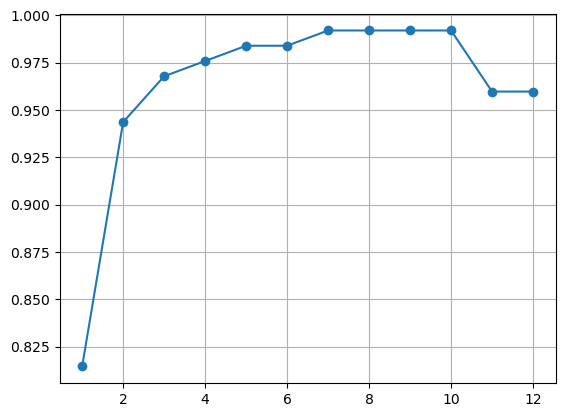

In [91]:
plt.plot(range(1,13),scores, marker='o')
plt.grid()
plt.show()

In [92]:
df_wine.columns


Index(['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [93]:
df_wine.columns[1:][f_masks[6]]

Index(['Alcohol', 'Ash', 'Alcalinity of ash', 'Flavanoids',
       'Nonflavanoid phenols', 'Hue', 'Proline'],
      dtype='object')

In [94]:
knn.fit(X_train_std[:,f_masks[1]], y_train)
print(f'테스트 정확도 : {knn.score(X_test_std[:,f_masks[1]],y_test):.3f}')

테스트 정확도 : 0.889


In [95]:
X_train.shape, X_test.shape

((124, 13), (54, 13))

In [96]:
from sklearn.ensemble import RandomForestClassifier

feat_lables=df_wine.columns[1:] # dtype : ndarray #1부터 끝까지 
feat_lables


Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [97]:
forest=RandomForestClassifier(
    n_estimators=500
    , random_state=1
)
forest.fit(X_train, y_train) #학습 , 모델완성

RandomForestClassifier(n_estimators=500, random_state=1)

In [98]:
# 피쳐 중요도 추출 
importance= forest.feature_importances_ 
importance, feat_lables

(array([0.13822434, 0.03085574, 0.00873805, 0.0299998 , 0.02513494,
        0.05823566, 0.14612287, 0.01154759, 0.0257134 , 0.15315771,
        0.07752497, 0.114818  , 0.17992694]),
 Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
        'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
        'Proanthocyanins', 'Color intensity', 'Hue',
        'OD280/OD315 of diluted wines', 'Proline'],
       dtype='object'))

In [99]:
print(np.argsort(importance)) # 오름차순 
print(np.argsort(importance)[::-1]) #내림차순 인덱스
indices=np.argsort(importance)[::-1]
indices

[ 2  7  4  8  3  1  5 10 11  0  6  9 12]
[12  9  6  0 11 10  5  1  3  8  4  7  2]


array([12,  9,  6,  0, 11, 10,  5,  1,  3,  8,  4,  7,  2])

In [106]:
# 피처 중요도 출력
# X_train.shape, X_train.shape[1] => ((124, 13), 13)
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f+1,30, feat_lables[indices[f]], importance[indices[f]])) # 1) Proline          0.17992694

 1) Proline                        0.179927
 2) Color intensity                0.153158
 3) Flavanoids                     0.146123
 4) Alcohol                        0.138224
 5) OD280/OD315 of diluted wines   0.114818
 6) Hue                            0.077525
 7) Total phenols                  0.058236
 8) Malic acid                     0.030856
 9) Alcalinity of ash              0.030000
10) Proanthocyanins                0.025713
11) Magnesium                      0.025135
12) Nonflavanoid phenols           0.011548
13) Ash                            0.008738


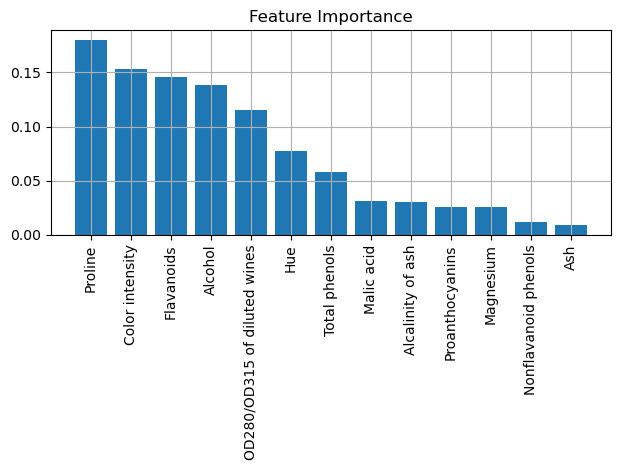

In [107]:
plt.title('Feature Importance')
plt.bar(
    range(X_train.shape[1]) # 피처 개수(13개) 0~12
    , importance[indices] # 내림차순한 중요도
    , align='center' 
)
plt.xticks(
    range(X_train.shape[1]) # 13
    , feat_lables[indices]
    , rotation=90
)

plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.grid()

plt.show()


In [ ]:
from sklearn.feature_selection import SelectFromModel

threshold=0.05
sfm=SelectFromModel(forest, threshold=0.05, prefit=True) 

X_selected=sfm.transform(X_train) # 13개 피쳐에서 중요도가 0.1보다 큰 피쳐 선택택
X_selected.shape

(124, 7)

In [108]:
from sklearn.feature_selection import SelectFromModel

threshold=0.05
sfm=SelectFromModel(forest, threshold=threshold,prefit=True)

X_selected=sfm.transform(X_train) # 13개 피처에서 중요도가 0.1보다 큰 피처를 선택
# 피처 선택 출력
print(f'이 임계 조건을 만족하는 피처의 수 : {X_selected.shape[1]}')
for f in range(X_selected.shape[1]):
    print('%2d) %-*s %f' % (f+1,30, feat_lables[indices[f]], importance[indices[f]])) # 1) Proline          0.17992694

이 임계 조건을 만족하는 피처의 수 : 7
 1) Proline                        0.179927
 2) Color intensity                0.153158
 3) Flavanoids                     0.146123
 4) Alcohol                        0.138224
 5) OD280/OD315 of diluted wines   0.114818
 6) Hue                            0.077525
 7) Total phenols                  0.058236


In [109]:
# 피처 선택 출력
print(f'이 임계 조건을 만족하는 피처의 수 : {X_selected.shape[1]}')
for f in range(X_selected.shape[1]):
    print('%2d) %-*s %f' % (f+1,30, feat_lables[indices[f]], importance[indices[f]])) # 1) Proline          0.17992694

이 임계 조건을 만족하는 피처의 수 : 7
 1) Proline                        0.179927
 2) Color intensity                0.153158
 3) Flavanoids                     0.146123
 4) Alcohol                        0.138224
 5) OD280/OD315 of diluted wines   0.114818
 6) Hue                            0.077525
 7) Total phenols                  0.058236
